In [1]:
import cv2
import numpy as np
import os

#load anh
path1 = '/content/drive/MyDrive/15p_gg/dataSet1/dataSet/DUY'
path2 = '/content/drive/MyDrive/15p_gg/dataSet1/dataSet/LUAN'
path3 = '/content/drive/MyDrive/15p_gg/dataSet1/dataSet/TAN'

images = []
a1 = np.full((1,60), 0)
a2 = np.full((1,60), 1)
a3 = np.full((1,60), 2)
c = np.concatenate((a1,a2), axis=1)
class_name = np.concatenate((c,a3), axis=1)
list1 = os.listdir(path1)
list2 = os.listdir(path2)
list3 = os.listdir(path3)
for c1 in list1:
    img1 = cv2.imread(f'{path1}/{c1}')
    images.append(img1)
for c2 in list2:
    img2 = cv2.imread(f'{path2}/{c2}')
    images.append(img2)
for c3 in list3:
    img3 = cv2.imread(f'{path3}/{c3}')
    images.append(img3)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.preprocessing import scale
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [4]:
X = np.array(images)
y = class_name.T

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
print(x_test.shape)
print(y_test.shape)


(45, 150, 150, 3)
(45, 3)


In [23]:
model = VGG16(include_top = False, input_shape = (150,150,3))
for layer in model.layers:
  layer.trainable = False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128,activation='relu',kernel_initializer= 'he_uniform')(flat1)
output = Dense(3,activation='sigmoid')(class1)
model = Model(inputs = model.input, outputs = output)
opt = SGD(lr = 0.01,momentum=0.9)
model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train, batch_size=64,epochs=10,verbose=1,validation_data = (x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 21s 3s/step - loss: 0.6187 - accuracy: 0.4741 - val_loss: 0.2684 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 1s 306ms/step - loss: 0.2250 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 1s 312ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 313ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 309ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 308ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 306ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=================

In [24]:
model.save('/content/drive/MyDrive/15p_gg/model_face_CNN.h5')


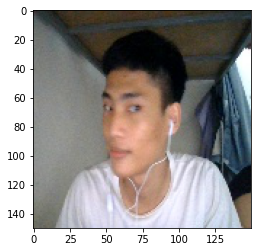

In [36]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

img = load_img('/content/drive/MyDrive/15p_gg/dataSet1/dataSet/LUAN/LUAN_10.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = np.expand_dims(img, axis = 0)
img = img.astype('float32')
img/=255.0

In [37]:
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
if a==0:
  print("DUY")
elif a==1:
  print("N.LUAN")
else:
  print("TAN")

[[5.9825752e-04 9.9776232e-01 3.4648905e-04]]
N.LUAN


In [ ]:
""